In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import datasets, linear_model
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [12]:
rawData = pd.read_csv("/content/drive/MyDrive/Masters Degree/Machine Learning/Assessment1/task1/Task1_RegressionTask_CancerData.txt", delim_whitespace=True) #importing the dataset
print ("The shape of the data: ", rawData.shape) # prints data shape

The shape of the data:  (97, 11)


In [13]:
rawData.info()
rawData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               97 non-null     int64  
 1   logCancerVol        97 non-null     float64
 2   logCancerWeight     97 non-null     float64
 3   age                 97 non-null     int64  
 4   logBenighHP         97 non-null     float64
 5   svi                 97 non-null     int64  
 6   logCP               97 non-null     float64
 7   gleasonScore        97 non-null     int64  
 8   gleasonS45          97 non-null     int64  
 9   levelCancerAntigen  97 non-null     float64
 10  train               97 non-null     object 
dtypes: float64(5), int64(5), object(1)
memory usage: 8.5+ KB


,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [14]:
y1=rawData['levelCancerAntigen']
y1.shape

(97,)

In [15]:
x1=rawData.drop(columns=['index','train','levelCancerAntigen'])
x1.shape

(97, 8)

-0.162519    3
 1.266948    3
 2.853592    2
 2.008214    2
 2.962692    2
            ..
 2.085672    1
 4.684443    1
 1.766442    1
 1.731656    1
 2.788093    1
Name: levelCancerAntigen, Length: 85, dtype: int64


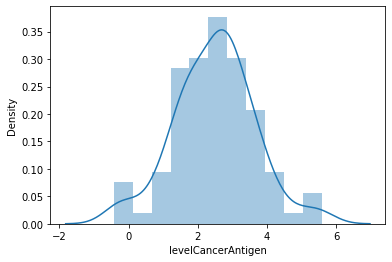

In [16]:
print(y1.value_counts())
sns.distplot(y1)

In [17]:
scaler = preprocessing.MinMaxScaler().fit(x1)
x1_Norm = scaler.transform(x1)
x1_Norm = pd.DataFrame(columns=x1.columns,data=x1_Norm)
x1_Norm

,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45
0,0.148460,0.164023,0.236842,0.000000,0.0,0.000000,0.000000,0.0
1,0.068269,0.392737,0.447368,0.000000,0.0,0.000000,0.000000,0.0
2,0.161810,0.131507,0.868421,0.000000,0.0,0.000000,0.333333,0.2
3,0.027689,0.377423,0.447368,0.000000,0.0,0.000000,0.000000,0.0
4,0.406048,0.439608,0.552632,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
92,0.808297,0.624196,0.710526,0.000000,1.0,0.631180,0.333333,0.6
93,1.000000,0.632724,0.078947,0.000000,1.0,0.828664,0.333333,0.4
94,0.823231,0.424564,0.289474,0.000000,1.0,0.897374,0.333333,0.1
95,0.818416,0.581591,0.710526,0.793094,1.0,0.686276,0.333333,0.8


In [18]:
x1_Norm_train = x1_Norm[rawData['train'] == 'T']
x1_Norm_train

,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45
0,0.148460,0.164023,0.236842,0.000000,0.0,0.000000,0.000000,0.00
1,0.068269,0.392737,0.447368,0.000000,0.0,0.000000,0.000000,0.00
2,0.161810,0.131507,0.868421,0.000000,0.0,0.000000,0.333333,0.20
3,0.027689,0.377423,0.447368,0.000000,0.0,0.000000,0.000000,0.00
4,0.406048,0.439608,0.552632,0.000000,0.0,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...
90,0.888834,0.717908,0.710526,0.000000,0.0,0.000000,0.000000,0.00
91,0.750758,0.541539,0.526316,0.736511,1.0,0.000000,0.333333,0.15
92,0.808297,0.624196,0.710526,0.000000,1.0,0.631180,0.333333,0.60
93,1.000000,0.632724,0.078947,0.000000,1.0,0.828664,0.333333,0.40


In [19]:
x1_Norm_test = x1_Norm[rawData['train'] == 'F']
x1_Norm_test

,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45
6,0.403291,0.456713,0.605263,0.539105,0.0,0.000000,0.000000,0.00
8,0.110398,0.484146,0.157895,0.000000,0.0,0.000000,0.000000,0.00
9,0.303830,0.361524,0.578947,0.000000,0.0,0.000000,0.000000,0.00
14,0.494003,0.443618,0.421053,0.000000,0.0,0.222706,0.333333,0.05
21,0.659106,0.468155,0.500000,0.770635,0.0,0.637313,0.333333,0.20
24,0.335199,0.537313,0.736842,0.804203,0.0,0.000000,0.000000,0.00
25,0.540625,0.311647,0.710526,0.454237,0.0,0.000000,0.000000,0.00
27,0.183162,0.619866,0.684211,0.862670,0.0,0.000000,0.333333,0.20
31,0.295931,0.594282,0.631579,0.832583,0.0,0.000000,0.000000,0.00
33,0.262578,0.371136,0.342105,0.000000,0.0,0.000000,0.000000,0.00


In [20]:
y1_train = y1[rawData['train'] == 'T']
y1_train

0    -0.430783
1    -0.162519
2    -0.162519
3    -0.162519
4     0.371564
        ...   
90    4.029806
91    4.129551
92    4.385147
93    4.684443
95    5.477509
Name: levelCancerAntigen, Length: 67, dtype: float64

In [21]:
y1_test = y1[rawData['train'] == 'F']
y1_test

6     0.765468
8     1.047319
9     1.047319
14    1.398717
21    1.658228
24    1.731656
25    1.766442
27    1.816452
31    2.008214
33    2.021548
35    2.085672
41    2.307573
43    2.374906
47    2.568788
48    2.591516
49    2.591516
52    2.684440
53    2.691243
54    2.704711
56    2.788093
61    2.853592
63    2.882004
64    2.882004
65    2.887590
72    3.056357
73    3.075006
79    3.513037
83    3.570940
94    5.143124
96    5.582932
Name: levelCancerAntigen, dtype: float64

In [ ]:
plt.figure(figsize=(7, 7), dpi=80)

plt.rcParams['font.size']=14
labels = ['Trainnig data', 
         'Testing Data']
percentages = rawData['train'].value_counts()
percentages = [percentages[0], percentages[1]]
explode=(0,0.05)

plt.pie(percentages, explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

 

plt.axis('equal')
plt.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [ ]:
plt.rcParams['figure.figsize']=10,10
g = sns.heatmap(rawData.corr(),annot=True, fmt = ".1f", cmap = "coolwarm")

In [79]:
reg = LinearRegression().fit(x1_Norm_train,y1_train)
y1_computed = reg.predict(x1_Norm_test)
print(y1_computed.dtype)
score = r2_score(y1_test, y1_computed)
print("The r-squared score in Linear Regression is: ", score*100,"%")

float64
The r-squared score in Linear Regression is:  50.33798502381801 %


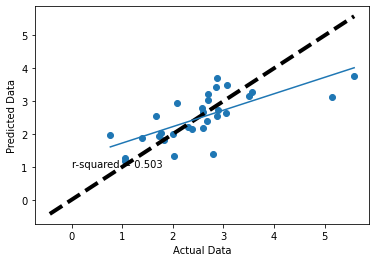

In [81]:
fig, ax = plt.subplots()
ax.scatter(y1_test, y1_computed)
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax.set_xlabel('Actual Data')
ax.set_ylabel('Predicted Data')

y1_test, y1_computed = y1_test.reshape(-1,1), y1_computed.reshape(-1,1)
ax.plot(y1_test, Lasso(alpha=0.001).fit(y1_test, y1_computed).predict(y1_test))

plt.annotate("r-squared = {:.3f}".format(r2_score(y1_test, y1_computed)), (0, 1))

plt.show()

In [102]:
reg = Ridge(alpha=0.9).fit(x1_Norm_train,y1_train)
y1_computed = reg.predict(x1_Norm_test)
score = r2_score(y1_test, y1_computed)

print("The r-squared score in Ridge Regression is: ", score*100,"%")

The r-squared score in Ridge Regression is:  51.009853611820674 %


In [ ]:
fig, ax = plt.subplots()
ax.scatter(y1_test, y1_computed)
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax.set_xlabel('Actual Data')
ax.set_ylabel('Predicted Data')

y1_test, y1_computed = y1_test.values.reshape(-1,1), y1_computed.reshape(-1,1)
ax.plot(y1_test, Ridge(alpha=0.7).fit(y1_test, y1_computed).predict(y1_test))

plt.annotate("r-squared = {:.3f}".format(r2_score(y1_test, y1_computed)), (0, 1))

plt.show()

In [112]:
reg = Lasso(alpha=0.01).fit(x1_Norm_train,y1_train)
y1_computed = reg.predict(x1_Norm_test)
score = r2_score(y1_test, y1_computed)

print("The r-squared score in Lasso Regression is: ", score*100,"%")



The r-squared score in Lasso Regression is:  54.44781315680106 %


In [ ]:
fig, ax = plt.subplots()
ax.scatter(y1_test, y1_computed)
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax.set_xlabel('Actual Data')
ax.set_ylabel('Predicted Data')

y1_test, y1_computed = y1_test.reshape(-1,1), y1_computed.reshape(-1,1)
ax.plot(y1_test, Lasso(alpha=0.000001).fit(y1_test, y1_computed).predict(y1_test))

plt.annotate("r-squared = {:.3f}".format(r2_score(y1_test, y1_computed)), (0, 1))

plt.show()